In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data= pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
from sklearn.preprocessing import LabelEncoder


# Drop irrelevant columns
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

# Split the dataset into features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional, depending on the model)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the preprocessed data
print("Preprocessed Titanic dataset:")
print(X_train_scaled)
print(y_train)


Preprocessed Titanic dataset:
[[-1.61413602  0.7243102   1.25364106 ... -0.47934164 -0.07868358
   0.5635246 ]
 [-0.40055118  0.7243102  -0.47728355 ... -0.47934164 -0.37714494
   0.5635246 ]
 [ 0.81303367  0.7243102   0.21508629 ... -0.47934164 -0.47486697
   0.5635246 ]
 ...
 [ 0.81303367  0.7243102   0.90745614 ... -0.47934164 -0.35580399
   0.5635246 ]
 [-1.61413602 -1.38062393 -1.1696534  ...  2.04874166  1.68320121
   0.5635246 ]
 [-1.61413602  0.7243102  -0.63114352 ...  0.78470001  0.86074761
   0.5635246 ]]
331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64


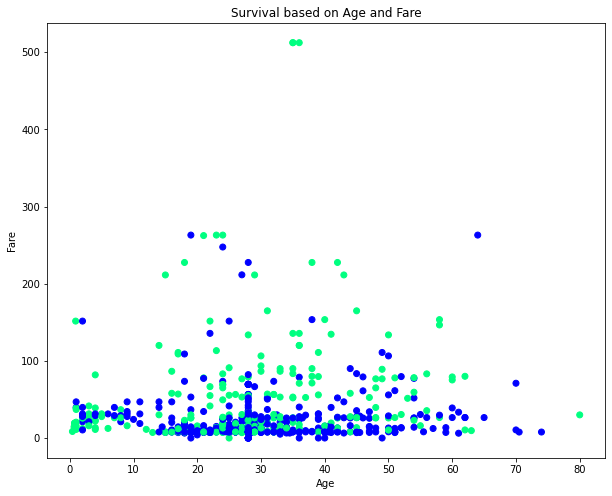

In [8]:
# visualize the data
plt.figure(figsize=(10, 8))
plt.scatter(X_train['Age'], X_train['Fare'], c=y_train, cmap='winter')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Survival based on Age and Fare')
plt.show()

Interview questions and answers:

Q1: What is data cleaning, and why is it important?A1: Data cleaning refers to the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in a dataset. It is important because it ensures the quality and reliability of the data used for analysis.

Q2: What are some common data cleaning techniques?A2: Some common data cleaning techniques include handling missing values, removing duplicates, dealing with outliers, correcting inconsistent data, and standardizing data formats.

Q3: How do you handle missing values in a dataset?A3: Missing values can be handled by imputing them with mean, median, or mode values, using predictive models, or removing the rows or columns with missing values depending on the context.

Q4: What is the purpose of outlier detection, and how can it be performed?A4: Outlier detection helps identify unusual or extreme observations in a dataset. It can be performed using statistical methods like the z-score, IQR (interquartile range), or visualization techniques like box plots or scatter plots.

Q5: Explain the concept of feature scaling.A5: Feature scaling is the process of standardizing or normalizing numerical features to a common scale to ensure they have a similar impact on the analysis or modeling algorithms.

Basic definitions and terms:- Missing values: Values that are absent or unavailable in a dataset.- Outlier detection: The process of identifying extreme or unusual observations in a dataset.- Feature scaling: Rescaling numerical features to a common scale.- Data cleaning: The process of identifying and correcting errors, inconsistencies, and inaccuracies in a dataset.- Preprocessing: The steps taken to transform raw data into a suitable format for analysis or modeling.

Multiple choice questions:

What is the purpose of data cleaning?a. To reduce the size of the dataset.b. To remove outliers from the dataset.c. To handle missing values and inconsistencies.d. To convert categorical variables into numerical form.Answer: c

Which technique is used to handle missing data?a. Removing the entire row with missing values.b. Replacing missing values with the mean of the column.c. Using predictive models to impute missing values.d. All of the above.Answer: d

What does outlier detection help in identifying?a. Unusual or extreme data points.b. Missing values in the dataset.c. Categorical variables.d. Continuous variables.Answer: a

What is the purpose of feature scaling?a. To make the data visually appealing.b. To standardize numerical features to a common scale.c. To convert categorical variables into numerical form.d. To create additional features for modeling.Answer: b

What is the first step in data preprocessing?a. Data cleaning.b. Feature engineering.c. Data visualization.d. Model training.Answer: a